In [366]:
# pip install qiskit

In [367]:
# pip install qiskit.Aer

In [368]:
import pandas as pd
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit, execute, Aer
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import asin, sqrt, pi, log
from statistics import mean
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [369]:
# Loaded the Dataset
data = pd.read_csv('neo_v2.csv')

In [370]:
# Writing code for Pre-Procesing

cat_max_dia = []
cat_RV = []
cat_miss = []

max_dia_mean = mean(data['est_diameter_max'])
Rv_mean = mean(data['relative_velocity'])

print("\n\nThe Mean Max Diameter is: ", max_dia_mean)
print("The Mean Relative Velocity is: ", Rv_mean)



The Mean Max Diameter is:  0.28494685223540667
The Mean Relative Velocity is:  48066.91891764293


In [371]:
for i,j, z in zip(data['est_diameter_max'], data['relative_velocity'], data['miss_distance']):
    if i>=max_dia_mean:
        cat_max_dia.append("Large")
    else :
        cat_max_dia.append("Small")

    if j>=Rv_mean:
        cat_RV.append("Fast")
    else:
        cat_RV.append("Slow")

    if z>=0 and z< 25000000:
        cat_miss.append("Less")
    elif z>= 25000000 and z<50000000:
        cat_miss.append("Medium")
    else:
        cat_miss.append("More")

processed_data = pd.DataFrame(list(zip(data['est_diameter_max'], data['relative_velocity'],data['miss_distance'], cat_max_dia, cat_RV,cat_miss, data['hazardous'])),columns=['Max_Diameter','Relative_Velocity','Miss_Distance', 'Categorized_Diameter', 'Categorized_Relative_Vel','Categorised_Miss_Distance','Hazardous'])


In [372]:
# Saving the Processed Data to get a better view
processed_data.to_csv('processedData.csv')

In [373]:
# Splitted the Dataset into Training and Testing
train_input, test_input = train_test_split(processed_data, test_size=0.3, random_state=50)

In [374]:
# Printing Number of records in training and testing
print("There are {} Training Records and {} Testing Records".format(train_input.shape[0], test_input.shape[0]))

# Printing the Number of True and False Records in Train and Test Dataset
print("Train Dataset: No of True: {}, No. False: {}".format(len(train_input[train_input['Hazardous'] == True]), len(train_input[train_input['Hazardous'] == False])))
print("Test Dataset: No of True: {}, No. False: {}".format(len(test_input[test_input['Hazardous'] == True]), len(test_input[test_input['Hazardous'] == False])))


There are 63585 Training Records and 27251 Testing Records
Train Dataset: No of True: 6260, No. False: 57325
Test Dataset: No of True: 2580, No. False: 24671


In [375]:
# Probability of Max Diameter:
def prob_hazard_calc(df, category_name, category_val):
    pop = df[df[category_name] == category_val]
    hazard_pop = pop[pop['Hazardous'] == True]
    p_pop = len(hazard_pop)/len(pop)
    return p_pop, len(pop)


In [376]:
# For Max Diameter:

# for small:
p_small, pop_small = prob_hazard_calc(train_input, "Categorized_Diameter", "Small")
print(p_small, pop_small)

# for Large:
p_large, pop_large = prob_hazard_calc(train_input, "Categorized_Diameter", "Large")
print(p_large, pop_large)

0.024916261480280928 46275
0.2950317735413056 17310


In [377]:
print("\n\nPrinting Chances of Max Diameter Objects given they are hazardous:\n")
print("{} Small Diameter objects had {} chances of being hazardous".format(pop_small, p_small))
print("{} Large Diameter objects had {} chances of being hazardous".format(pop_large, p_large))




Printing Chances of Max Diameter Objects given they are hazardous:

46275 Small Diameter objects had 0.024916261480280928 chances of being hazardous
17310 Large Diameter objects had 0.2950317735413056 chances of being hazardous


In [378]:
 # For Relative Velocity:

# for Slow:
p_slow, pop_slow = prob_hazard_calc(train_input, "Categorized_Relative_Vel", "Slow")
# print(p_slow)

# for Fast:
p_fast, pop_fast = prob_hazard_calc(train_input, "Categorized_Relative_Vel", "Fast")
# print(p_fast)

In [379]:
print("\n\nPrinting Chances of Relative Velocity Objects given they are hazardous:\n")
print("{} Slow Relative Velocity objects had {} chances of being hazardous".format(pop_slow, p_slow))
print("{} Fast Relative Velocity objects had {} chances of being hazardous".format(pop_fast, p_fast))




Printing Chances of Relative Velocity Objects given they are hazardous:

35499 Slow Relative Velocity objects had 0.058705879038846165 chances of being hazardous
28086 Fast Relative Velocity objects had 0.1486861781670583 chances of being hazardous


In [380]:
# For Miss Distance:

# For Less
p_less, pop_less = prob_hazard_calc(train_input, "Categorised_Miss_Distance", "Less")
# print(p_less, pop_less)

# For Medium
p_med, pop_med = prob_hazard_calc(train_input, "Categorised_Miss_Distance", "Medium")
# print(p_med, pop_med)

# For More:
p_more, pop_more = prob_hazard_calc(train_input, "Categorised_Miss_Distance", "More")
# print(p_more, pop_more)

In [381]:
print("\n\nPrinting Chances of Miss Distance Objects given they are hazardous:\n")
print("{} Less Miss Distance objects had {} chances of being hazardous".format(pop_less, p_less))
print("{} Medium Miss Distance objects had {} chances of being hazardous".format(pop_med, p_med))
print("{} More Miss Distance objects had {} chances of being hazardous".format(pop_more, p_more))



Printing Chances of Miss Distance Objects given they are hazardous:

21698 Less Miss Distance objects had 0.0861369711494147 chances of being hazardous
20413 Medium Miss Distance objects had 0.10209180424239456 chances of being hazardous
21474 More Miss Distance objects had 0.10743224364347582 chances of being hazardous


In [382]:
# Specifying the marginal probability
def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

In [383]:
# Initialize the quantum circuit
qc = QuantumCircuit(3)

# Set qubit0 to p_large i.e for Max Diameter
qc.ry(prob_to_angle(p_large), 0)

# Set qubit1 to p_fast i.e for Relative Velocity
qc.ry(prob_to_angle(p_fast), 1)

In [384]:
# Defining the CCRY‐gate:
def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

In [385]:
# Calculating the conditional probabilities

# fast Relative Velocity and large Diameter
population_fast=train_input[train_input.Categorized_Relative_Vel.eq("Fast")]
population_fast_large= population_fast[population_fast.Categorized_Diameter.eq("Large")]
hazardous_fast_large = population_fast_large[population_fast_large.Hazardous.eq(1)]
p_hazardous_fast_large=len(hazardous_fast_large)/len(population_fast_large)
# print(p_hazardous_fast_large)

In [386]:
# fast Relative Velocity and small Diameter
population_fast_small = population_fast[population_fast.Categorized_Diameter.eq("Small")]
hazardous_fast_small = population_fast_small[population_fast_small.Hazardous.eq(1)]
p_hazardous_fast_small=len(hazardous_fast_small)/len(population_fast_small)


In [387]:
# Slow Relative Velocity and Large Diameter
population_slow = train_input[train_input.Categorized_Relative_Vel.eq("Slow")]
population_slow_large = population_slow[population_slow.Categorized_Diameter.eq("Large")]
hazardous_slow_large=population_slow_large[population_slow_large.Hazardous.eq(1)]
p_hazardous_slow_large=len(hazardous_slow_large)/len(population_slow_large)

In [388]:
# Slow Relative Velocity and Small Diameter
population_slow_small = population_slow[population_slow.Categorized_Diameter.eq("Small")]
hazardous_slow_small = population_slow_small[population_slow_small.Hazardous.eq(1)]
p_hazardous_slow_small=len(hazardous_slow_small)/len(population_slow_small)


In [389]:
# Initializing the child node:

# set state |00> to conditional probability of slow RV and small Diameter
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_hazardous_slow_small),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of slow RV and large Diameter
qc.x(0)
ccry(qc,prob_to_angle(p_hazardous_slow_large),0,1,2)
qc.x(0)

# set state |10> to conditional probability of fast RV and small Diameter
qc.x(1)
ccry(qc,prob_to_angle(p_hazardous_fast_small),0,1,2)
qc.x(1)

# set state |11> to conditional probability of fast RV and large Diameter
ccry(qc,prob_to_angle(p_hazardous_fast_large),0,1,2)


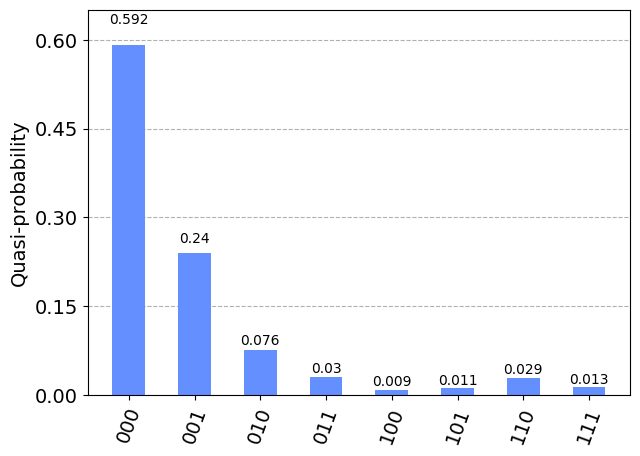

In [390]:
# Circuit execution

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

In [391]:
# Quantum circuit with classical register
qr = QuantumRegister(3)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

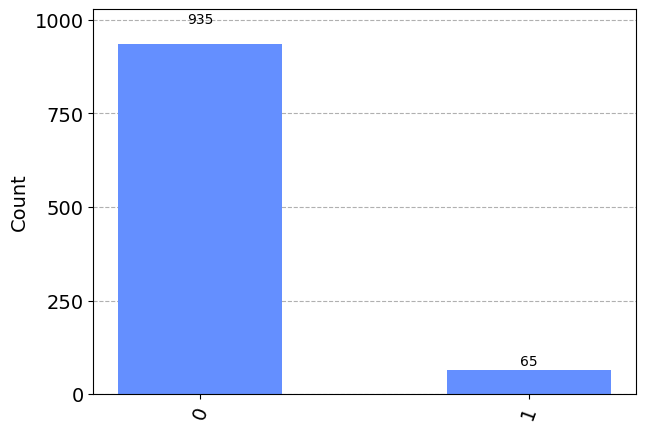

In [392]:
# Listing Run the circuit including a measurement

# Set qubit0 to p_small i.e for Max Diameter
qc.ry(prob_to_angle(p_large), 0)

# Set qubit1 to p_fast i.e for Relative Velocity
qc.ry(prob_to_angle(p_fast), 1)

# set state |00> to conditional probability of slow RV and small Diameter
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_hazardous_slow_small),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of slow RV and large Diameter
qc.x(0)
ccry(qc,prob_to_angle(p_hazardous_slow_large),0,1,2)
qc.x(0)

# set state |10> to conditional probability of fast RV and small Diameter
qc.x(1)
ccry(qc,prob_to_angle(p_hazardous_fast_small),0,1,2)
qc.x(1)

# set state |11> to conditional probability of fast RV and large Diameter
ccry(qc,prob_to_angle(p_hazardous_fast_large),0,1,2)

qc.measure(qr[2], cr[0])
results = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
plot_histogram(results)

# Bayesian Interference


In [393]:
# Dataset with missing values
data = [
    (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, None), (0, 1), (1, 0)
]

In [394]:
# The log‐likelihood function adapted for our data
def log_likelihood(data, prob_a_b, prob_a_nb, prob_na_b, prob_na_nb):
    def get_prob(point):
        if point[0] == 1 and point[1] == 1:
            return log(prob_a_b)
        elif point[0] == 1 and point[1] == 0:
            return log(prob_a_nb)
        elif point[0] == 0 and point[1] == 1:
            return log(prob_na_b)
        elif point[0] == 0 and point[1] == 0:
            return log(prob_na_nb)
        else:
            return log(prob_na_b+prob_na_nb)

    return sum(map(get_prob, data))

In [395]:
# The as‐pqc function
def as_pqc(cnt_quantum, with_qc, cnt_classical=1, shots=1, hist=False, measure=False):
    # Prepare the circuit with qubits and a classical bit to hold the measurement
    qr = QuantumRegister(cnt_quantum)
    cr = ClassicalRegister(cnt_classical)
    qc = QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

    with_qc(qc, qr=qr, cr=cr)

    results = execute(
        qc,
        Aer.get_backend('statevector_simulator') if measure is False else Aer.get_backend('qasm_simulator'),
        shots=shots
    ).result().get_counts()

    return plot_histogram(results, figsize=(12,4)) if hist else results

In [396]:
# The quantum Bayesian network
def qbn(data, hist=True):
    def circuit(qc, qr=None, cr=None):
        list_a = list(filter(lambda item: item[0] == 1, data))
        list_na = list(filter(lambda item: item[0] == 0, data))

        # set the marginal probability of A
        qc.ry(prob_to_angle(
            len(list_a) / len(data)
        ), 0)

        # set the conditional probability of NOT A and (B / not B)
        qc.x(0)
        qc.cry(prob_to_angle(
            sum(list(map(lambda item: item[1], list_na))) /  len(list_na)
        ),0,1)
        qc.x(0)

        # set the conditional probability of A and (B / not B)
        qc.cry(prob_to_angle(
            sum(list(map(lambda item: item[1], list_a))) /  len(list_a)
        ),0,1)

    return as_pqc(2, circuit, hist=hist)

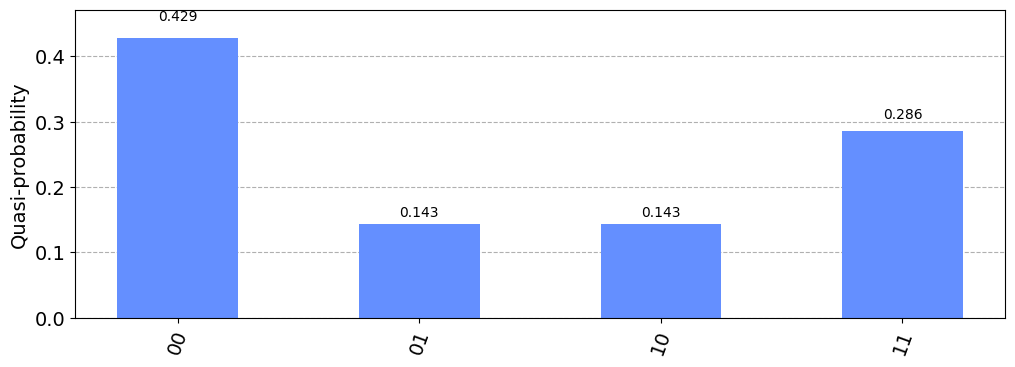

In [397]:
# Ignoring the missing data
qbn(list(filter(lambda item: item[1] is not None ,data)))

In [398]:

# Calculate the log‐likelihood when ignoring the missing data
def eval_qbn(model, prepare_data, data):
    results = model(prepare_data(data), hist=False)
    return (
        round(log_likelihood(data,
            results['11'], # prob_a_b
            results['01'], # prob_a_nb
            results['10'], # prob_na_b
            results['00']  # prob_na_nb
        ), 3),
        results['10'] / (results['10'] + results['00'])
    )

print(eval_qbn(qbn, lambda dataset: list(filter(lambda item: item[1] is not None ,dataset)), data))

(-9.499, 0.25)


In [399]:
# Calculate the log‐likelihood when filling in 0
print(eval_qbn(qbn, lambda dataset: list(map(lambda item: item if item[1] is not None else (item[0], 0) ,dataset)), data))

(-9.481, 0.2)


In [400]:

# Evaluating the guess
print(eval_qbn(qbn, lambda dataset: list(map(lambda item: item if item[1] is not None else (item[0], 0.5) ,dataset)), data))

(-9.476, 0.3)


In [401]:
# Refining the model
print(eval_qbn(qbn, lambda dataset: list(map(lambda item: item if item[1] is not None else (item[0], 0.3) ,dataset)), data))

(-9.452, 0.26)


In [402]:
# Further refining the model
print(eval_qbn(qbn, lambda dataset: list(map(lambda item: item if item[1] is not None else (item[0], 0.252) ,dataset)), data))

(-9.451, 0.2504)


In [403]:
# Another iteration
print(eval_qbn(qbn, lambda dataset: list(map(lambda item: item if item[1] is not None else (item[0], 0.252) ,dataset)), data))

(-9.451, 0.2504)


# Section Estimating A Variable

In [404]:
# positions of the qubits
QPOS_dia = 0
QPOS_RV = 1

def apply_islarge_fast(qc):
    # set the marginal probability of large Diameter
    qc.ry(prob_to_angle(p_large), QPOS_dia)

    # set the marginal probability of Fast Relative Velocity
    qc.ry(prob_to_angle(p_fast), QPOS_RV)

In [405]:
# Defining the CCRY‐gate:
def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

In [406]:
# Listing Represent the norm
# position of the qubit representing the norm
QPOS_NORM = 2

def apply_norm(qc, norm_params):
    """
    norm_params = {
        'p_norm_small_slow': 0.25,
        'p_norm_small_fast': 0.35,
        'p_norm_large_slow': 0.45,
        'p_norm_large_fast': 0.55
    }
    """

    # set the conditional probability of Norm given small/slow
    qc.x(QPOS_dia)
    qc.x(QPOS_RV)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_small_slow']
    ),QPOS_dia, QPOS_RV, QPOS_NORM)
    qc.x(QPOS_dia)
    qc.x(QPOS_RV)

    # set the conditional probability of Norm given small/fast
    qc.x(QPOS_dia)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_small_fast']
    ),QPOS_dia, QPOS_RV, QPOS_NORM)
    qc.x(QPOS_dia)

    # set the conditional probability of Norm given large/slow
    qc.x(QPOS_RV)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_large_slow']
    ),QPOS_dia, QPOS_RV, QPOS_NORM)
    qc.x(QPOS_RV)

    # set the conditional probability of Norm given large/fast
    ccry(qc, prob_to_angle(
        norm_params['p_norm_large_fast']
    ),QPOS_dia, QPOS_RV, QPOS_NORM)


In [407]:
# Listing Calculate the probabilities related to the miss distance
pop_more = train_input[train_input.Categorised_Miss_Distance.eq("More")]
hazardous_more =  round(len(pop_more[pop_more.Hazardous.eq(1)])/len(pop_more), 2)
p_more = round(len(pop_more)/len(train_input), 2)

pop_med = train_input[train_input.Categorised_Miss_Distance.eq("Medium")]
hazardous_med =  round(len(pop_med[pop_med.Hazardous.eq(1)])/len(pop_med), 2)
p_med = round(len(pop_med)/len(train_input), 2)

pop_less = train_input[train_input.Categorised_Miss_Distance.eq("Less")]
hazardous_less =  round(len(pop_less[pop_less.Hazardous.eq(1)])/len(pop_less), 2)
p_less = round(len(pop_less)/len(train_input), 2)

print("More Miss Distance: {} of the Objects, hazardous: {}".format(p_more , hazardous_more))
print("Medium Miss Distance: {} of the Objects, hazardous: {}".format(p_med,hazardous_med))
print("Less Miss Distance: {} of the Objects, hazardous: {}".format(p_less,hazardous_less))

More Miss Distance: 0.34 of the Objects, hazardous: 0.11
Medium Miss Distance: 0.32 of the Objects, hazardous: 0.1
Less Miss Distance: 0.34 of the Objects, hazardous: 0.09


In [408]:
# Listing Represent the miss-distance
# positions of the qubits
QPOS_more = 3
QPOS_med = 4
QPOS_less = 5

def apply_class(qc):
    # set the marginal probability of miss-distance=more
    qc.ry(prob_to_angle(p_more), QPOS_more)

    qc.x(QPOS_more)
    # set the marginal probability of Pclass=2nd
    qc.cry(prob_to_angle(p_med/(1-p_more)), QPOS_more, QPOS_med)

    # set the marginal probability of Pclass=3rd
    qc.x(QPOS_med)
    ccry(qc, prob_to_angle(p_less/(1-p_more-p_med)), QPOS_more, QPOS_med, QPOS_less)
    qc.x(QPOS_med)
    qc.x(QPOS_more)

In [409]:
# Listing Represent hazardous
# position of the qubit
QPOS_hazardous = 6

def apply_hazardous(qc, hazardous_params):
    """
    hazardous_params = {
        'p_hazardous_favoured_more': 0.3,
        'p_hazardous_favoured_med': 0.4,
        'p_hazardous_favoured_less': 0.5,
        'p_hazardous_unfavoured_more': 0.6,
        'p_hazardous_unfavoured_med': 0.7,
        'p_hazardous_unfavoured_less': 0.8
    }
    """

    # set the conditional probability of Survival given unfavored by norm
    qc.x(QPOS_NORM)
    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_unfavoured_more']
    ),QPOS_NORM, QPOS_more, QPOS_hazardous)

    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_unfavoured_med']
    ),QPOS_NORM, QPOS_med, QPOS_hazardous)

    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_unfavoured_less']
    ),QPOS_NORM, QPOS_less, QPOS_hazardous)
    qc.x(QPOS_NORM)

    # set the conditional probability of hazardous given favored by norm
    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_favoured_more']
    ),QPOS_NORM, QPOS_more, QPOS_hazardous)

    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_favoured_med']
    ),QPOS_NORM, QPOS_med, QPOS_hazardous)

    ccry(qc, prob_to_angle(
        hazardous_params['p_hazardous_favoured_less']
    ),QPOS_NORM, QPOS_less, QPOS_hazardous)


In [410]:
# Listing The quantum bayesian network
QUBITS = 7

def qbn_neo(norm_params, hazardous_params, hist=True, measure=False, shots=1):
    def circuit(qc, qr=None, cr=None):
        apply_islarge_fast(qc)
        apply_norm(qc, norm_params)
        apply_class(qc)
        apply_hazardous(qc, hazardous_params)

    return as_pqc(QUBITS, circuit, hist=hist, measure=measure, shots=shots)


In [411]:
# Listing Try the QBN
norm_params = {
    'p_norm_small_slow': 0.25,
    'p_norm_small_fast': 0.35,
    'p_norm_large_slow': 0.45,
    'p_norm_large_fast': 0.55
}

hazardous_params = {
    'p_hazardous_favoured_more': 0.3,
    'p_hazardous_favoured_med': 0.4,
    'p_hazardous_favoured_less': 0.5,
    'p_hazardous_unfavoured_more': 0.6,
    'p_hazardous_unfavoured_med': 0.7,
    'p_hazardous_unfavoured_less': 0.8
}


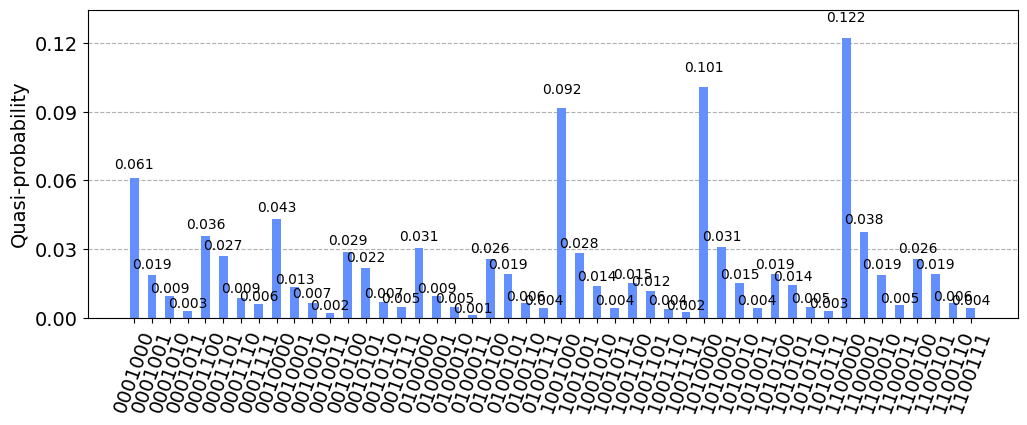

In [412]:
qbn_neo(norm_params, hazardous_params, hist=True)


In [413]:
# Listing Calculate the parameters of the norm
def calculate_norm_params(objects):
    # the different diameteric objects in our data
    pop_large = objects[objects.Categorized_Diameter.eq("Large")]
    pop_small = objects[objects.Categorized_Diameter.eq("Small")]

    # combinations of being a large object and Relative Velocity
    pop_small_slow = pop_small[pop_small.Categorized_Relative_Vel.eq('Slow')]
    pop_small_fast = pop_small[pop_small.Categorized_Relative_Vel.eq('Fast')]
    pop_large_slow = pop_large[pop_large.Categorized_Relative_Vel.eq('Slow')]
    pop_large_fast = pop_large[pop_large.Categorized_Relative_Vel.eq('Fast')]

    norm_params = {
        'p_norm_small_slow': pop_small_slow.Norm.sum() /  len(pop_small_slow),
        'p_norm_small_fast': pop_small_fast.Norm.sum() /  len(pop_small_fast),
        'p_norm_large_slow': pop_large_slow.Norm.sum() /  len(pop_large_slow),
        'p_norm_large_fast': pop_large_fast.Norm.sum() /  len(pop_large_fast),
    }

    return norm_params


In [414]:
# Listing Calculate the parameters of hazardous
def calculate_hazardous_params(objects):
    # all hazardous
    hazardous = objects[objects.Hazardous.eq(1)]

    # weight the object
    def weight_object(norm, missDistance):
        return lambda object: (object[0] if norm else 1-object[0]) * (1 if object[1] == missDistance else 0)

    # calculate the probability of being hazardous
    def calc_prob(norm, missDistance):
        return sum(list(map(
            weight_object(norm, missDistance),
            list(zip(hazardous['Norm'], hazardous['Categorised_Miss_Distance']))
        ))) / sum(list(map(
            weight_object(norm, missDistance),
            list(zip(objects['Norm'], objects['Categorised_Miss_Distance']))
        )))

    hazardous_params = {
        'p_hazardous_favoured_more': calc_prob(True, "More"),
        'p_hazardous_favoured_med': calc_prob(True, "Medium"),
        'p_hazardous_favoured_less': calc_prob(True, "Less"),
        'p_hazardous_unfavoured_more': calc_prob(False, "More"),
        'p_hazardous_unfavoured_med': calc_prob(False, "Medium"),
        'p_hazardous_unfavoured_less': calc_prob(False, "Less")
    }

    return hazardous_params


In [415]:
# Listing Prepare the data
def prepare_data(objects, params):
    """
    params = {
        'p_norm_large_slow_hazardous': 0.45,
        'p_norm_large_slow_nonhazardous': 0.46,
        'p_norm_large_fast_hazardous': 0.47,
        'p_norm_large_fast_nonhazardous': 0.48,
        'p_norm_small_slow_hazardous': 0.49,
        'p_norm_small_slow_nonhazardous': 0.51,
        'p_norm_small_fast_hazardous': 0.52,
        'p_norm_small_fast_nonhazardous': 0.53,
    }
    """
    # is the object large?
    objects['IsLarge'] = objects['Categorized_Diameter'].map(lambda dia: 0 if dia == "Small" else 1)

    # the probability of favored by norm given diameter, relative velocity, and hazardous
    objects['Norm'] = list(map(
        lambda item: params['p_norm_{}_{}_{}'.format(
            'small' if item[0] == "Small" else 'large',
            'slow' if item[1] == "Slow" else 'fast',
            'nonhazardous' if item[2] == 0 else 'hazardous'
        )],
        list(zip(objects['IsLarge'], objects['Categorized_Relative_Vel'], objects['Hazardous']))
    ))
    return objects


In [416]:
# Listing Initialize the parameters
# Step 0: Initialize the parameter values
params = {
    'p_norm_large_slow_hazardous': 0.45,
    'p_norm_large_slow_nonhazardous': 0.46,
    'p_norm_large_fast_hazardous': 0.47,
    'p_norm_large_fast_nonhazardous': 0.48,
    'p_norm_small_slow_hazardous': 0.49,
    'p_norm_small_slow_nonhazardous': 0.51,
    'p_norm_small_fast_hazardous': 0.52,
    'p_norm_small_fast_nonhazardous': 0.53,
}


In [417]:
# Listing Run the qbn
objects = prepare_data(test_input, params)
results = qbn_neo(calculate_norm_params(objects), calculate_hazardous_params(objects), hist=False)
print(objects)
objects.to_csv('objects.csv')


       Max_Diameter  Relative_Velocity  Miss_Distance Categorized_Diameter  \
10344      0.118588       39981.611676   1.272941e+07                Small   
9427       0.206082       25831.105183   7.147113e+07                Small   
30105      0.015633       23641.318190   5.253373e+07                Small   
3396       0.225964       61724.820117   3.984482e+07                Small   
8767       0.098637       75514.808582   5.909602e+07                Small   
...             ...                ...            ...                  ...   
38183      0.051765       29758.614038   2.647132e+07                Small   
44613      0.078350       38307.816272   2.753888e+06                Small   
23119      0.026794       43630.086043   2.378008e+07                Small   
39019      0.016370       10498.037672   5.356362e+07                Small   
51518      0.369862      133299.367585   7.083885e+07                Large   

      Categorized_Relative_Vel Categorised_Miss_Distance  Hazar

In [418]:
# Listing Get a list of relevant states
def filter_states(states, position, value):
    return list(filter(lambda item: item[0][QUBITS-1-position] == str(value), states))


In [419]:
# Listing The states with hazardous objects
filter_states(results.items(), QPOS_hazardous, '1')


[('1001000', 0.011743601771621),
 ('1001001', 0.004938356598385),
 ('1001010', 0.001976021014081),
 ('1001011', 0.000831110215539),
 ('1001100', 0.00974763214708),
 ('1001101', 0.004056395720212),
 ('1001110', 0.001775646263831),
 ('1001111', 0.000739080051968),
 ('1010000', 0.010439352360194),
 ('1010001', 0.004389900612554),
 ('1010010', 0.001756563279163),
 ('1010011', 0.000738806761239),
 ('1010100', 0.008722502317211),
 ('1010101', 0.003629796501879),
 ('1010110', 0.001588906763931),
 ('1010111', 0.00066135317466),
 ('1100000', 0.008800324840595),
 ('1100001', 0.003700665527462),
 ('1100010', 0.001480774565924),
 ('1100011', 0.000622810617842),
 ('1100100', 0.007394501434019),
 ('1100101', 0.003077160023837),
 ('1100110', 0.001346995726356),
 ('1100111', 0.000560662160991)]

In [420]:
# Listing Calculate the marginal probability to be hazardous
def sum_states(states):
    return sum(map(lambda item: item[1], states))

sum_states(filter_states(results.items(), QPOS_hazardous, '1'))


0.094718920450574

In [421]:
# Listing The log‐likelihood function adapted for our data
def log_likelihood_neo(data, results):
    states = results.items()

    def calc_prob(norm_val, islarge_val, rv_val, hazardous_val):
        return sum_states(
            filter_states(
                filter_states(
                    filter_states(
                        filter_states(states, QPOS_RV, rv_val),
                        QPOS_dia, islarge_val
                    ), QPOS_hazardous, hazardous_val
                ), QPOS_NORM, norm_val))

    probs = {
        'p_favoured_large_slow_hazardous': calc_prob('1', '1', '0', '1'),
        'p_favoured_large_slow_nonhazardous': calc_prob('1', '1', '0', '0'),
        'p_favoured_large_fast_hazardous': calc_prob('1', '1', '1', '1'),
        'p_favoured_large_fast_nonhazardous': calc_prob('1', '1', '1', '0'),
        'p_favoured_small_slow_hazardous': calc_prob('1', '0', '0', '1'),
        'p_favoured_small_slow_nonhazardous': calc_prob('1', '0', '0', '0'),
        'p_favoured_small_fast_hazardous': calc_prob('1', '0', '1', '1'),
        'p_favoured_small_fast_nonhazardous': calc_prob('1', '0', '1', '0'),
        'p_unfavoured_large_slow_hazardous': calc_prob('0', '1', '0', '1'),
        'p_unfavoured_large_slow_nonhazardous': calc_prob('0', '1', '0', '0'),
        'p_unfavoured_large_fast_hazardous': calc_prob('0', '1', '1', '1'),
        'p_unfavoured_large_fast_nonhazardous': calc_prob('0', '1', '1', '0'),
        'p_unfavoured_small_slow_hazardous': calc_prob('0', '0', '0', '1'),
        'p_unfavoured_small_slow_nonhazardous': calc_prob('0', '0', '0', '0'),
        'p_unfavoured_small_fast_hazardous': calc_prob('0', '0', '1', '1'),
        'p_unfavoured_small_fast_nonhazardous': calc_prob('0', '0', '1', '0'),
    }

    return round(sum(map(
        lambda item: log(probs['p_{}_{}_{}_{}'.format(
                'unfavoured',
                'small' if item[1] == 0 else 'large',
                'slow' if item[2] == "Slow" else 'fast',
                'nonhazardous' if item[3] == 0 else 'hazardous'
            )] + probs['p_{}_{}_{}_{}'.format(
                'favoured',
                'small' if item[1] == 0 else 'large',
                'slow' if item[2] == "Slow" else 'fast',
                'nonhazardous' if item[3] == 0 else 'hazardous'
            )]
        ),
        list(zip(data['Norm'], data['IsLarge'], data['Categorized_Relative_Vel'], data['Hazardous']))
    )), 3)


In [422]:
# Listing Calculate the log‐likelihood
log_likelihood_neo(test_input, results)


-49915.85

In [423]:
# Listing Obtain new object values from the results
def to_params(results):
    states = results.items()

    def calc_norm(islarge_val, rv_val, hazardous_val):
        pop = filter_states(filter_states(filter_states(states, QPOS_RV, rv_val), QPOS_dia, islarge_val), QPOS_hazardous, hazardous_val)

        p_norm = sum(map(lambda item: item[1], filter_states(pop, QPOS_NORM, '1')))
        p_total = sum(map(lambda item: item[1], pop))
        return p_norm / p_total


    return {
        'p_norm_large_slow_hazardous': calc_norm('1', '0', '1'),
        'p_norm_large_slow_nonhazardous': calc_norm('1', '0', '0'),
        'p_norm_large_fast_hazardous': calc_norm('1', '1', '1'),
        'p_norm_large_fast_nonhazardous': calc_norm('1', '1', '0'),
        'p_norm_small_slow_hazardous': calc_norm('0', '0', '1'),
        'p_norm_small_slow_nonhazardous': calc_norm('0', '0', '0'),
        'p_norm_small_fast_hazardous': calc_norm('0', '1', '1'),
        'p_norm_small_fast_nonhazardous': calc_norm('0', '1', '0'),
    }


In [424]:
# Listing Calcualte new objects
to_params(results)


{'p_norm_large_slow_hazardous': 0.45238852749547404,
 'p_norm_large_slow_nonhazardous': 0.45778381062698825,
 'p_norm_large_fast_hazardous': 0.4721181899190917,
 'p_norm_large_fast_nonhazardous': 0.4775435801439691,
 'p_norm_small_slow_hazardous': 0.45497950025308315,
 'p_norm_small_slow_nonhazardous': 0.46037970567954806,
 'p_norm_small_fast_hazardous': 0.47471965863046167,
 'p_norm_small_fast_nonhazardous': 0.48014775213199684}

In [425]:
# Listing The recursive training automatism
def train_qbn_neo(objects, params, iterations):
    if iterations > 0:
        new_params = train_qbn_neo(objects, params, iterations - 1)

        objects = prepare_data(objects, new_params)
        results = qbn_neo(calculate_norm_params(objects), calculate_hazardous_params(objects), hist=False)

        print ('The log-likelihood after {} iteration(s) is {}'.format(iterations, log_likelihood_neo(objects, results)))
        return to_params(results)

    return params


In [426]:
# Listing Train the QBN
test_params = train_qbn_neo(test_input, {
    'p_norm_large_slow_hazardous': 0.45,
    'p_norm_large_slow_nonhazardous': 0.46,
    'p_norm_large_fast_hazardous': 0.47,
    'p_norm_large_fast_nonhazardous': 0.48,
    'p_norm_small_slow_hazardous': 0.49,
    'p_norm_small_slow_nonhazardous': 0.51,
    'p_norm_small_fast_hazardous': 0.52,
    'p_norm_small_fast_nonhazardous': 0.53,
}, 25)


The log-likelihood after 1 iteration(s) is -49915.85
The log-likelihood after 2 iteration(s) is -49915.718
The log-likelihood after 3 iteration(s) is -49915.526
The log-likelihood after 4 iteration(s) is -49915.273
The log-likelihood after 5 iteration(s) is -49914.953
The log-likelihood after 6 iteration(s) is -49914.561
The log-likelihood after 7 iteration(s) is -49914.09
The log-likelihood after 8 iteration(s) is -49913.531
The log-likelihood after 9 iteration(s) is -49912.875
The log-likelihood after 10 iteration(s) is -49912.109
The log-likelihood after 11 iteration(s) is -49911.223
The log-likelihood after 12 iteration(s) is -49910.204
The log-likelihood after 13 iteration(s) is -49909.038
The log-likelihood after 14 iteration(s) is -49907.712
The log-likelihood after 15 iteration(s) is -49906.214
The log-likelihood after 16 iteration(s) is -49904.533
The log-likelihood after 17 iteration(s) is -49902.664
The log-likelihood after 18 iteration(s) is -49900.605
The log-likelihood af

In [427]:
# Listing The parameters after training
test_params


{'p_norm_large_slow_hazardous': 0.7796128340298285,
 'p_norm_large_slow_nonhazardous': 0.6657193077663542,
 'p_norm_large_fast_hazardous': 0.8108952682185933,
 'p_norm_large_fast_nonhazardous': 0.7070943179196169,
 'p_norm_small_slow_hazardous': 0.7567090402657648,
 'p_norm_small_slow_nonhazardous': 0.6364979427698882,
 'p_norm_small_fast_hazardous': 0.790501002545843,
 'p_norm_small_fast_nonhazardous': 0.6799241985658918}

In [428]:
# Listing Pre‐processing
def pre_process(object):
    return (object['IsLarge'] == 1, object['Categorized_Relative_Vel'] == 'Fast', object['Categorised_Miss_Distance'])


In [429]:
# Listing Apply the known data on the quantum circuit
def apply_known(qc, is_large, is_fast, missDistance):
    if is_large:
        qc.x(QPOS_dia)

    if is_fast:
        qc.x(QPOS_RV)

    qc.x(QPOS_more if missDistance == "More" else (QPOS_med if missDistance == "Medium" else QPOS_less))


In [430]:
# Listing Get the trained QBN
def get_trained_qbn(objects, params):

    prepared_objects = prepare_data(objects, params)
    norm_params = calculate_norm_params(prepared_objects)
    hazardous_params = calculate_hazardous_params(prepared_objects)

    def trained_qbn_neo(object):
        (is_large, is_fast, missDistance) = object

        def circuit(qc, qr, cr):
            apply_known(qc, is_large, is_fast, missDistance)
            apply_norm(qc, norm_params)
            apply_hazardous(qc, hazardous_params)

            qc.measure(qr[QPOS_hazardous], cr[0])

        return as_pqc(QUBITS, circuit, hist=False, measure=True, shots=100)

    return trained_qbn_neo


In [431]:
# Listing Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    #print (counts)
    p_hazardous = counts['1'] if '1' in counts.keys() else 0
    p_nonhazardous = counts['0'] if '0' in counts.keys() else 0

    #return int(list(map(lambda item: item[0], counts.items()))[0])
    return 1 if p_hazardous > p_nonhazardous else 0


In [432]:
# Preparing Report
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0


In [433]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)
    output = pd.DataFrame(list(zip(labels, cr_predictions)), columns=['Labels', 'Predictions'])
    output.to_csv('output.csv')
    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print("Confusion Matrix is:")
    print(cr_cm)

    print('The precision score of the {} classifier is {}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {}'
        .format(name, cr_npv))
    print('The information level is: {}'
        .format(cr_level))


In [434]:
# Listing Run the Quantum Naive Bayes Classifier
# redefine the run-function
def run(f_classify, data):
    return [f_classify(data.iloc[i]) for i in range(0,len(data))]


In [435]:
# get the simple qbn
trained_qbn = get_trained_qbn(test_input, test_params)


In [439]:
# evaluate the Quantum Bayesian Network
classifier_report("QBN",
    run,
    lambda object: post_process(trained_qbn(pre_process(object))),
    objects,
    test_input['Hazardous'])


Confusion Matrix
[[29601  3188]
 [  652  2894]]
The accuracy score of the QBN classifier is 89.43167744598871
The precision score of the QBN classifier is 47.58303189740217
The recall score of the QBN classifier is 81.61308516638466
The specificity score of the QBN classifier is 90.27722711885083
The npv score of the QBN classifier is 97.84484183386772
The information level is: 79.32954650412634
